In [2866]:
# import Library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, recall_score

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# Load Dataset

In [2867]:
hotel = pd.read_csv('hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2868]:
df = hotel[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']].head(5000)
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [2869]:
df['is_canceled'].value_counts()

0    2702
1    2298
Name: is_canceled, dtype: int64

In [2870]:
df['is_canceled'].value_counts()/df.shape[0]
# datasetnya balanced, sehingga tidak perlu dilakukan balancing treatment

0    0.5404
1    0.4596
Name: is_canceled, dtype: float64

# A. Exploratory Data Analysis (EDA)

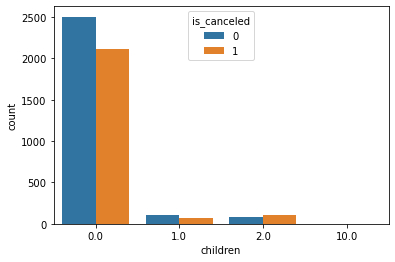

In [2871]:
sns.countplot(x = 'children', hue = 'is_canceled', data=df)

dari grafik di atas, dapat kita lihat bahwa rasio tertinggi untuk user yang cancel adalah ketika user yang booking mengikutsertakan 2 children.

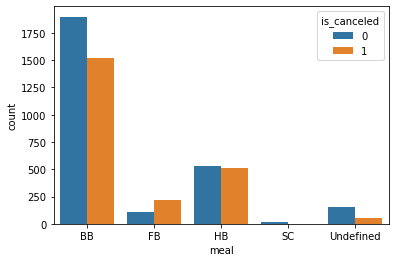

In [2872]:
sns.countplot(x = 'meal', hue = 'is_canceled', data=df)

dari grafik di atas, dapat kita lihat bahwa rasio tertinggi untuk user yang cancel adalah ketika user yang booking memesan FB (Full Board (breakfast, lunch and dinner)) sebagai meal mereka.

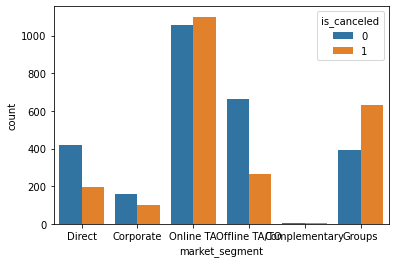

In [2873]:
sns.countplot(x = 'market_segment', hue = 'is_canceled', data=df)

dari grafik di atas, dapat kita lihat bahwa rasio tertinggi untuk user yang cancel adalah user yang merupakan segment Groups

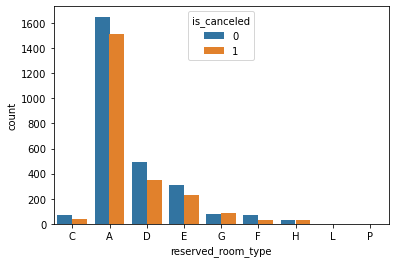

In [2874]:
sns.countplot(x = 'reserved_room_type', hue = 'is_canceled', data=df)

dari grafik di atas, dapat kita lihat bahwa rasio tertinggi untuk user yang cancel adalah user yang melakukan booking tipe room G

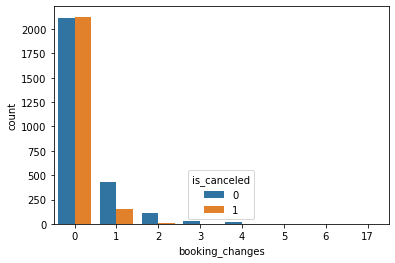

In [2875]:
sns.countplot(x = 'booking_changes', hue = 'is_canceled', data=df)

dari grafik di atas, dapat kita lihat bahwa rasio tertinggi untuk user yang cancel adalah user yang tidak melakukan perubahan terhadap bookingan mereka sejak pertama kali booking

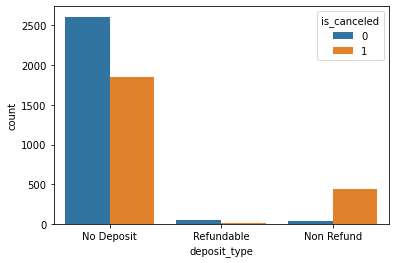

In [2876]:
sns.countplot(x = 'deposit_type', hue = 'is_canceled', data=df)

dari grafik di atas, dapat kita lihat bahwa rasio tertinggi untuk user yang cancel adalah user yang terkena kebijakan Non Refund

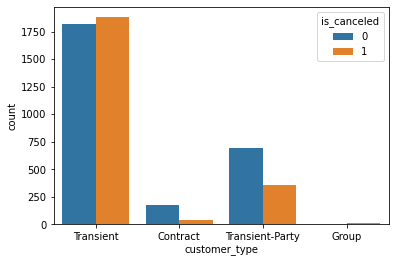

In [2877]:
sns.countplot(x = 'customer_type', hue = 'is_canceled', data=df)

dari grafik di atas, dapat kita lihat bahwa rasio tertinggi untuk user yang cancel adalah user yang tipenya adalah Transient (when the booking is not part of a group or contract, and is not associated to other transient booking)

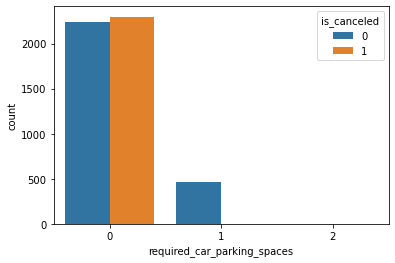

In [2878]:
sns.countplot(x = 'required_car_parking_spaces', hue = 'is_canceled', data=df)

dari grafik di atas, dapat kita lihat bahwa rasio tertinggi untuk user yang cancel adalah user yang tidak melakukan request mengenai space parkir mobil

Insight untuk Manajemen Hotel: Berdasarkan EDA terhadap dataset ini, ke 8 fitur yang sudah saya tampilkan di atas sajalah yang perlu lebih ditekankan ketimbang ke 8 fitur lainnnya (yang tidak saya tampilkan), karena ke 8 fitur yang tidak saya tampilkan tersebut memiliki rasio positif atau bisa dibilang tidak ada relevansinya dengan booking cancellation.

Sehingga, ketika ada customer yang melakukan booking, hal-hal yang perlu diperhatikan adalah children, meal, market segment, reserved room type, booking changes, deposit type, customer type, dan required car parking spaces. Karena ke 8 fitur inilah yang paling menentukan apakah user tersebut akan cancel atau tidak jika dibandingkan dengan 8 fitur yang tidak saya sebutkan

# B. Data Cleaning & Preprocessing

In [2879]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [2880]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [2881]:
df.describe(include='all')

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000,4998,5000,5000,5000,5000.000000,5000,5000.000000,5000,5000.000000,5000.000000
unique,1,NaN,NaN,NaN,NaN,5,56,6,3,9,NaN,3,NaN,4,NaN,NaN
top,Resort Hotel,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,A,NaN,No Deposit,NaN,Transient,NaN,NaN
freq,5000,NaN,NaN,NaN,NaN,3418,3174,2156,3657,3167,NaN,4461,NaN,3699,NaN,NaN
mean,NaN,0.459600,1.969800,0.115600,0.014800,NaN,NaN,NaN,NaN,NaN,0.207200,NaN,1.772000,NaN,0.093800,0.602000
std,NaN,0.498415,1.566326,0.444833,0.122409,NaN,NaN,NaN,NaN,NaN,0.612489,NaN,13.545358,NaN,0.292948,0.823245
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
50%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
75%,NaN,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,1.000000


In [2882]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

## Handling Outliers

In [2883]:
# function for finding outliers
def find_anomalies(data):
    anomalies = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

    for outlier in data:
        if outlier < limit_bawah or outlier > limit_atas:
            anomalies.append(outlier)
            counter = (len(anomalies))
    print(f'total anomalies: {counter}')
    print(f'anomalies: {anomalies}')        
    return anomalies

> ## Outliers in Adults

In [2884]:
df['adults'].value_counts()

2     4175
1      654
3      146
0        6
26       5
4        3
27       2
5        2
20       2
55       1
50       1
10       1
6        1
40       1
Name: adults, dtype: int64

In [2885]:
find_anomalies(df['adults'])

IQR: 0.0
limit_bawah: 2.0
limit_atas: 2.0
total anomalies: 825
anomalies: [1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 4, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 4, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 4, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 40, 3, 1, 1, 3, 1, 26, 1, 1, 3, 3, 1, 50, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 26, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 26, 3, 1, 1, 27, 1, 1, 1, 3, 27, 3, 1, 1, 26, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 26, 1, 55, 1, 1, 1, 1, 0, 20, 6, 5, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 10, 2

[1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 4,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 4,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 40,
 3,
 1,
 1,
 3,
 1,
 26,
 1,
 1,
 3,
 3,
 1,
 50,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 26,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 26,
 3,
 1,
 1,
 27,
 1,
 1,
 1,
 3,
 27,
 3,
 1,
 1,
 26,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,


Berdasarkan perhitungan di atas, data di fitur adults yang nilainya bukan 2 adalah data outlier. Namun, saya memutuskan untuk tetap memasukkan data yang nilainya 0 hingga 3 karena data tersebut masih relatif dekat dengan nilai mean dan standard deviasinya. Maka dari itu, saya putuskan untuk drop data yang memiliki nilai adults lebih dari 3

In [2886]:
df = df[df['adults']<=3]
df
# sisa data adalah 4981

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


> ## Outliers in Children

In [2887]:
df['children'].value_counts()

0.0     4606
2.0      194
1.0      180
10.0       1
Name: children, dtype: int64

In [2888]:
find_anomalies(df['children'])

IQR: 0.0
limit_bawah: 0.0
limit_atas: 0.0
total anomalies: 375
anomalies: [1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 10.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0,

[1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 10.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.

Berdasarkan perhitungan di atas, data di fitur children yang nilainya bukan 0 adalah data outlier. Namun, saya memutuskan untuk tetap memasukkan data yang nilainya 1 karena data tersebut masih relatif dekat dengan nilai mean dan standard deviasinya. Maka dari itu, saya putuskan untuk drop data yang memiliki nilai children lebih dari 1

In [2889]:
df = df[df['children']<=1]
df
# sisa data adalah 4786

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


> ## Outliers in Booking Changes

In [2890]:
df['booking_changes'].value_counts()

0     4072
1      549
2      111
3       29
4       18
5        4
6        2
17       1
Name: booking_changes, dtype: int64

In [2891]:
find_anomalies(df['booking_changes'])

IQR: 0.0
limit_bawah: 0.0
limit_atas: 0.0
total anomalies: 714
anomalies: [3, 4, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 5, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 4, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 4, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2, 1, 2, 2, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 

[3,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 5,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 17,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

Berdasarkan perhitungan di atas, data di fitur booking changes yang nilainya bukan 0 adalah data outlier. Namun, saya memutuskan untuk tetap memasukkan data yang nilainya 1 karena data tersebut masih relatif dekat dengan nilai mean dan standard deviasinya. Maka dari itu, saya putuskan untuk drop data yang memiliki nilai booking changes lebih dari 1

In [2892]:
df = df[df['booking_changes']<=1]
df
# sisa data adalah 4621

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
5,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
6,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,0,No Deposit,0,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


> ## Outliers in Days in Waiting List

In [2893]:
df['days_in_waiting_list'].value_counts()

0      4529
122      51
47       21
65       19
50        1
Name: days_in_waiting_list, dtype: int64

In [2894]:
find_anomalies(df['days_in_waiting_list'])

IQR: 0.0
limit_bawah: 0.0
limit_atas: 0.0
total anomalies: 92
anomalies: [50, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122]


[50,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122]

Berdasarkan perhitungan di atas, data di fitur days in waiting list yang nilainya bukan 0 adalah data outlier. Data selain 0 memang memiliki nilai yang jauh dari nilai mean. Maka dari itu, saya putuskan untuk drop data yang memiliki nilai days in waiting list nya bukan 0.

In [2895]:
df = df[df['days_in_waiting_list']==0]
df
# sisa data adalah 4529

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
5,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
6,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,0,No Deposit,0,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


> ## Outliers in Required Car Parking Spaces

In [2896]:
df['required_car_parking_spaces'].value_counts()

0    4118
1     410
2       1
Name: required_car_parking_spaces, dtype: int64

In [2897]:
find_anomalies(df['required_car_parking_spaces'])

IQR: 0.0
limit_bawah: 0.0
limit_atas: 0.0
total anomalies: 411
anomalies: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


Berdasarkan perhitungan di atas, data di fitur required car parking spaces yang nilainya bukan 0 adalah data outlier. Data selain 0 memang memiliki nilai yang jauh dari nilai mean. Maka dari itu, saya putuskan untuk drop data yang memiliki nilai required car parking spaces nya bukan 0.

In [2898]:
df = df[df['required_car_parking_spaces']==0]
df
# sisa data adalah 4118

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
5,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
6,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,0,No Deposit,0,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


> ## Outliers in Total of Special Requests

In [2899]:
df['total_of_special_requests'].value_counts()

0    2433
1    1023
2     563
3      96
4       3
Name: total_of_special_requests, dtype: int64

In [2900]:
find_anomalies(df['total_of_special_requests'])

IQR: 1.0
limit_bawah: -1.5
limit_atas: 2.5
total anomalies: 99
anomalies: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

Berdasarkan perhitungan di atas, data di fitur total of special requests yang nilainya lebih dari 2.5 (atau 2) adalah data outlier. Maka dari itu, saya putuskan untuk drop data yang memiliki nilai total of special requests nya lebih dari 2.

In [2901]:
df = df[df['total_of_special_requests']<=2]
df
# sisa data adalah 4019

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
5,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
6,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,0,No Deposit,0,Transient,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


## Encoders and Missing Data

In [2902]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
5,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
6,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,0,No Deposit,0,Transient,0,0


In [2903]:
df.describe(include='all')

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
count,4019,4019.000000,4019.000000,4019.000000,4019.000000,4019,4018,4019,4019,4019,4019.000000,4019,4019.0,4019,4019.0,4019.00000
unique,1,NaN,NaN,NaN,NaN,5,48,6,3,9,NaN,3,NaN,4,NaN,NaN
top,Resort Hotel,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,A,NaN,No Deposit,NaN,Transient,NaN,NaN
freq,4019,NaN,NaN,NaN,NaN,2700,2634,1660,2983,2687,NaN,3498,NaN,2971,NaN,NaN
mean,NaN,0.524757,1.889027,0.031849,0.010699,NaN,NaN,NaN,NaN,NaN,0.109480,NaN,0.0,NaN,0.0,0.53471
std,NaN,0.499449,0.392344,0.175619,0.102895,NaN,NaN,NaN,NaN,NaN,0.312279,NaN,0.0,NaN,0.0,0.72739
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,0.00000
25%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,0.00000
50%,NaN,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,0.00000
75%,NaN,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,1.00000


In [2904]:
df.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.0,4019.0,4019.00000
mean,0.524757,1.889027,0.031849,0.010699,0.109480,0.0,0.0,0.53471
std,0.499449,0.392344,0.175619,0.102895,0.312279,0.0,0.0,0.72739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000
max,1.000000,3.000000,1.000000,1.000000,1.000000,0.0,0.0,2.00000


In [2905]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        1
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

> ## Encode data with Encoders and Handling Missing Data

Encode Fitur:
* hotel: one hot encoder
* adults: passthrough
* children: passthrough
* babies: passthrough
* meal: binary encoder
* country: binary encoder
* market_segment: binary encoder
* distribution_channel: one hot encoder
* reserved_room_type: binary encoder
* booking_changes: passthrough
* deposit_type: one hot encoder
* days_in_waiting_list: passthrough
* customer_type: binary encoder
* required_car_parking_spaces: passthrough
* total_of_special_requests: passthrough

Untuk data nominal yang kategorinya kurang dari 3, saya putuskan untuk menggunakan one hot encoder. Sedangkan untuk data nominal yang kategorinya lebih dari 3, saya putuskan untuk menggunakan binary encoder.

Jadi, saya mengaplikasikan one hot encoder untuk 3 fitur: hotel, distribution_channel, dan deposit_type. Kemudian, saya mengaplikasikan binary encoder untuk 5 fitur: meal, country, market_segment, reserved_room_type, customer_type

Untuk fitur selain yang sudah saya sebutkan di atas (7 fitur: adults, children, babies, booking_changes, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests), saya passthrough karena memang fitur-fitur tersebut sudah bisa diproses lebih lanjut

In [2906]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        1
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

Handling Missing Data:
* country: drop

Karena hanya ada 1 missing data pada fitur country, saya putuskan untuk mendrop data tersebut dan tidak mengaplikasikan imputer

In [2907]:
df = df.dropna()

In [2908]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [2909]:
df.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.0,4018.0,4018.000000
mean,0.524639,1.889497,0.031857,0.010702,0.109507,0.0,0.0,0.534843
std,0.499455,0.391259,0.175640,0.102907,0.312313,0.0,0.0,0.727431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,0.0,0.0,2.000000


In [2910]:
df.describe(include='all')

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
count,4018,4018.000000,4018.000000,4018.000000,4018.000000,4018,4018,4018,4018,4018,4018.000000,4018,4018.0,4018,4018.0,4018.000000
unique,1,NaN,NaN,NaN,NaN,5,48,6,3,8,NaN,3,NaN,4,NaN,NaN
top,Resort Hotel,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,A,NaN,No Deposit,NaN,Transient,NaN,NaN
freq,4018,NaN,NaN,NaN,NaN,2700,2634,1660,2982,2687,NaN,3497,NaN,2970,NaN,NaN
mean,NaN,0.524639,1.889497,0.031857,0.010702,NaN,NaN,NaN,NaN,NaN,0.109507,NaN,0.0,NaN,0.0,0.534843
std,NaN,0.499455,0.391259,0.175640,0.102907,NaN,NaN,NaN,NaN,NaN,0.312313,NaN,0.0,NaN,0.0,0.727431
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,0.000000
25%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,0.000000
50%,NaN,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,0.000000
75%,NaN,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,1.000000


## Transformers

In [2911]:
transformer = ColumnTransformer([                               
                                ('one hot encoder',OneHotEncoder(drop = 'first'),['hotel','distribution_channel','deposit_type']),
                                ('binary encoder',ce.BinaryEncoder(),['meal','country','market_segment', 'reserved_room_type','customer_type'])
                                 ], remainder = 'passthrough')

## Data Defining

In [2912]:
X = df.drop(columns = ['is_canceled'])
y = df['is_canceled']

# C. Model Benchmark & Evaluation Metric

## Data Splitting


In [2913]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2021)

In [2914]:
model_1 = LogisticRegression() # logreg
model_2 = KNeighborsClassifier() # KNN
model_3 = DecisionTreeClassifier() # DT
skfold = StratifiedKFold(n_splits = 5)

models = [model_1, model_2, model_3]
CV_score_mean = []
CV_score_std = []

for i in models:
    Z = Pipeline([('transformer',transformer),('model',i)])
    CV_score_mean.append(cross_val_score(Z, X_train, y_train, cv=skfold, scoring='f1').mean())
    CV_score_std.append(cross_val_score(Z, X_train, y_train, cv=skfold, scoring='f1').std())

title = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree']

pd.DataFrame({'Method': title,'CV Score Mean': CV_score_mean, 'CV Score STD': CV_score_std})

,Method,CV Score Mean,CV Score STD
0,Logistic Regression,0.853340,0.010429
1,K Nearest Neighbors,0.843135,0.003681
2,Decision Tree,0.858135,0.011566


* Logistic Regression: model klasifikasi yang cara kerjanya dengan menggunakan algoritma regresi sebagai mathematical backgroundnya.
* K Nearest Neighbors: model klasifikasi yang cara kerjanya adalah dengan menggunakan algoritma yang menyimpan dan mengelompokkan data berdasarkan tingkat kemiripan antar data
* Decision Tree: model klasifikasi yang cara kerjanya adalah dengan menggunakan algoritma yang membuat keputusan dengan membagi data menjadi klasifikasi yang lebih kecil lagi (mengerucut).

Pada dataset ini, kita mau fokus terhadap F1 Score (menekan nilai FN dan FP).
 * Model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan. 
 >* jika yang terjadi adalah seperti ini, nantinya user kita yang datang pada hari H tidak akan mendapatkan service yang seharusnya mereka dapatkan (mulai dari dihubungi terkait perkiraan datang, membersihkan, merapikan, menyiapkan kamar user, mendapatkan welcoming drink/food, hingga pickup service) sehingga menimbulkan impression yang buruk terhadap hotel kita. Dan dampak jangka panjangnya adalah mungkin ada calon customer yang mendengar review dari user tersebut yang tidak jadi menggunakan jasa hotel kita. Selain itu, dampak lainnya adalah, akan ada juga user lain yang booking room yang sama sehingga terjadi double booking. Akhirnya, bisa jadi kedua user tersebut merasa kecewa dan sama-sama tidak jadi menggunakan jasa hotel kita.
 * Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan).
 >* jika yang terjadi adalah seperti ini, nantinya kita akan mengalokasikan resource service kita ke canceled user tersebut (mulai dari dihubungi terkait perkiraan datang, membersihkan, merapikan, menyiapkan kamar user, mendapatkan welcoming drink/food, hingga pickup service), padahal user tersebut tidak jadi datang. Selain itu, dampak lainnya adalah akan ada juga potential customer kita yang seharusnya menjadi customer kita namun kita tolak karena room/service yang seharusnya bisa digunakan, sudah kita alokasikan ke canceled user tersebut.

## Model Benchmark

Berdasarkan perhitungan di atas, dapat dilihat bahwa model terbaik adalah Decision Tree Classifier karena memiliki score rata-rata tertinggi dengan score standard deviasi yang relatif rendah

In [2915]:
model = DecisionTreeClassifier()

estimator1 = Pipeline([('transformer',transformer),('model',model)])
estimator1.fit(X_train,y_train)

y_pred = estimator1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       482
           1       0.83      0.88      0.85       523

    accuracy                           0.84      1005
   macro avg       0.84      0.84      0.84      1005
weighted avg       0.84      0.84      0.84      1005



# D. Hyperparameter Tuning

* Benchmark model : Decision Tree Classifier
* Parameter: 
>* min samples leaf: Jumlah sampel minimum yang dibutuhkan sebagai leaf
>* min samples split: Jumlah sampel minimum yang dibutuhkan untuk men-split node
>* max depth: Jumlah/batas maksimum kedalaman dari decision tree
>* criterion: Berfungsi untuk mengukur kualitas split.

In [2916]:
model = DecisionTreeClassifier()

estimator = Pipeline([('transformer',transformer),('model',model)])

hyperparam_space = {
        'model__min_samples_leaf' : [1,5,10,15,20,50], 
        'model__min_samples_split' : [2,5,10,15,20,50], 
        'model__max_depth' : [2,3,4,5,6,7], 
        'model__criterion' : ['entropy','gini']} 

skfold = StratifiedKFold(n_splits = 5)

grid_search1 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

grid_search1.fit(X_train, y_train)

grid_search1.best_estimator_.fit(X_train,y_train)

y_pred = grid_search1.best_estimator_.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       482
           1       0.81      0.84      0.83       523

    accuracy                           0.82      1005
   macro avg       0.82      0.81      0.82      1005
weighted avg       0.82      0.82      0.82      1005



In [2917]:
print('best score',grid_search1.best_score_)
print('best param',grid_search1.best_params_)

best score 0.8589954622785566
best param {'model__criterion': 'gini', 'model__max_depth': 7, 'model__min_samples_leaf': 10, 'model__min_samples_split': 2}


Performa setelah dilakukan Hyperparameter Tuning justru menurun. F1 score sebelum dilakukan tuning adalah sebesar 0.85, dan setelah dilakukan tuning adalah sebesar 0.83. Jadi model terbaik untuk memprediksi dataset ini adalah Decision Tree before Hyperparameter Tuning.

# Best Model = Decision Tree Classifier Before Tuning